#### Problem Statement: Complete product affinity segmentation with 311 customer review data for three products

#### Table of Contents

#### Incumbents
 - 1: $30, 3 hrs, 20 oz, Clean Easy, Leak Resistant, Brand A
   
 - 2: $10, 1 hrs, 20 oz, Clean Fair, Spill Resistant, Brand B

#### Our proposed candidate
 - 3: $ 30, 1 hrs, 20 oz, Clean Easy, Leak Resistant, Brand C

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from itertools import product
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:.4f}'.format)

In [2]:
priceComb = pd.Series(['$30','$10','$5'])
TimeInsulated = pd.Series(['0.5 hrs','1 hrs','3 hrs'])
Capacity = pd.Series(['12 oz','20 oz','32 0z'])
Cleanbility = pd.Series(['Difficult','Fair','Easy'])
Containment = pd.Series(['Slosh Resistant','Spill Resistant','Leak Resistant'])
Brand = pd.Series(['A','B','C'])
TimeCost=pd.Series([0.5,1,3])
CapacityCost=pd.Series([1,2.6,2.8])
CleanabilityCost=pd.Series([1,2.2,3.0])
ContainmentCost=pd.Series([0.5,0.8,1])
Cvalue=0.0139

PreferenceData=pd.read_csv("""/Users/sriharikodam/Documents/IsbAMPBA/Term5_22/Marketing and Customer Analytics/Assignment/PART 1/mugs-preference-parameters-full.csv""",dtype=int)
InferenceData=pd.read_csv("""/Users/sriharikodam/Documents/IsbAMPBA/Term5_22/Marketing and Customer Analytics/Assignment/PART 1/InferenceParameter.csv""",dtype=int)
DemographicData=pd.read_csv("""/Users/sriharikodam/Documents/IsbAMPBA/Term5_22/Marketing and Customer Analytics/Assignment/PART 2/demographics-full.csv""",dtype=float)

In [3]:
productA=pd.Series(['$30','3 hrs','20 oz','Easy','Leak Resistant'])
productB=pd.Series(['$10','1 hrs','20 oz','Fair','Spill Resistant'])
productC=pd.Series(['$30','1 hrs','20 oz','Easy','Leak Resistant'])
productDf=pd.DataFrame(data=[productA.T,productB.T,productC.T])

In [4]:
PrDFeatures = pd.DataFrame(data=[priceComb,TimeInsulated,Capacity,Cleanbility,Containment, 
                                 TimeCost,CapacityCost,CleanabilityCost,ContainmentCost]).T
PrDFeatures.columns=['Price','TimeInsulated','Capacity',
                     'Cleanbility','Containment','TimeCost',
                     'CapacityCost', 'CleanabilityCost','ContainmentCost']

productDf.columns=PrDFeatures.columns[0:5]
PrDFeatures['Time MC'] = PrDFeatures['Price'].str.replace('$','').astype(int)- PrDFeatures['TimeCost']
PrDFeatures['Capacity MC'] = PrDFeatures['Price'].str.replace('$','').astype(int)- PrDFeatures['CapacityCost']
PrDFeatures['Cleanability MC'] = PrDFeatures['Price'].str.replace('$','').astype(int)- PrDFeatures['CleanabilityCost']
PrDFeatures['Containment MC'] = PrDFeatures['Price'].str.replace('$','').astype(int)- PrDFeatures['ContainmentCost']

In [5]:
PrDFeatures

,Price,TimeInsulated,Capacity,Cleanbility,Containment,TimeCost,CapacityCost,CleanabilityCost,ContainmentCost,Time MC,Capacity MC,Cleanability MC,Containment MC
0,$30,0.5 hrs,12 oz,Difficult,Slosh Resistant,0.5000,1.0000,1.0000,0.5000,29.5000,29.0000,29.0000,29.5000
1,$10,1 hrs,20 oz,Fair,Spill Resistant,1.0000,2.6000,2.2000,0.8000,9.0000,7.4000,7.8000,9.2000
2,$5,3 hrs,32 0z,Easy,Leak Resistant,3.0000,2.8000,3.0000,1.0000,2.0000,2.2000,2.0000,4.0000


In [6]:
PreferenceData.head(10)

,Cust,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,pClD,pClF,pClE,pCnSl,pCnSp,pCnLk,pBrA,pBrB,pBrC
0,1,1,3,7,1,3,7,1,7,6,1,2,7,1,5,7,7,5,1
1,2,1,6,7,1,4,7,1,7,6,1,6,7,1,7,7,7,5,1
2,3,1,6,7,1,4,7,7,4,1,1,3,7,1,5,7,1,3,7
3,4,1,6,7,1,4,7,7,1,3,1,5,7,1,5,7,7,1,5
4,5,1,4,7,1,4,7,1,7,2,1,3,7,1,7,7,3,1,7
5,6,1,5,7,1,4,7,1,7,7,1,4,7,1,6,7,3,1,7
6,7,1,7,7,1,6,7,1,7,7,1,3,7,1,2,7,3,7,1
7,8,1,6,7,1,2,7,1,7,2,1,6,7,1,3,7,5,7,1
8,9,1,5,7,1,3,7,1,5,7,1,6,7,1,6,7,7,4,1
9,10,1,7,7,1,3,7,6,7,1,1,5,7,1,4,7,3,7,1


In [7]:
InferenceData.head(10)

,Cust,IPr,Iin,ICp,ICl,Icn,IBr
0,1,5,8,32,7,34,14
1,2,6,3,17,10,51,15
2,3,55,5,5,8,16,9
3,4,12,9,3,40,20,16
4,5,56,6,19,9,0,11
5,6,9,6,0,57,13,15
6,7,39,12,11,7,19,12
7,8,33,13,12,25,8,10
8,9,14,16,17,9,31,13
9,10,40,10,10,10,15,15


In [8]:
productDf

,Price,TimeInsulated,Capacity,Cleanbility,Containment
0,$30,3 hrs,20 oz,Easy,Leak Resistant
1,$10,1 hrs,20 oz,Fair,Spill Resistant
2,$30,1 hrs,20 oz,Easy,Leak Resistant


In [9]:
PreferenceData.shape,InferenceData.shape

((311, 19), (311, 7))

In [10]:
PrefInf=PreferenceData.iloc[:,1:4].multiply(InferenceData['IPr'],axis=0)
PrefInf=pd.concat([PrefInf,PreferenceData.iloc[:,4:7].multiply(InferenceData['Iin'],axis=0)],axis=1)
PrefInf=pd.concat([PrefInf,PreferenceData.iloc[:,7:10].multiply(InferenceData['ICp'],axis=0)],axis=1)
PrefInf=pd.concat([PrefInf,PreferenceData.iloc[:,10:13].multiply(InferenceData['ICl'],axis=0)],axis=1)
PrefInf=pd.concat([PrefInf,PreferenceData.iloc[:,13:16].multiply(InferenceData['Icn'],axis=0)],axis=1)
PrefInf=pd.concat([PrefInf,PreferenceData.iloc[:,16:19].multiply(InferenceData['IBr'],axis=0)],axis=1)

In [11]:
colLst= pd.concat([priceComb,TimeInsulated,Capacity,Cleanbility,Containment,Brand],axis=0).values
colLst
PrefInf.columns = colLst

In [12]:
PrefInf.head(10)

,$30,$10,$5,0.5 hrs,1 hrs,3 hrs,12 oz,20 oz,32 0z,Difficult,Fair,Easy,Slosh Resistant,Spill Resistant,Leak Resistant,A,B,C
0,5,15,35,8,24,56,32,224,192,7,14,49,34,170,238,98,70,14
1,6,36,42,3,12,21,17,119,102,10,60,70,51,357,357,105,75,15
2,55,330,385,5,20,35,35,20,5,8,24,56,16,80,112,9,27,63
3,12,72,84,9,36,63,21,3,9,40,200,280,20,100,140,112,16,80
4,56,224,392,6,24,42,19,133,38,9,27,63,0,0,0,33,11,77
5,9,45,63,6,24,42,0,0,0,57,228,399,13,78,91,45,15,105
6,39,273,273,12,72,84,11,77,77,7,21,49,19,38,133,36,84,12
7,33,198,231,13,26,91,12,84,24,25,150,175,8,24,56,50,70,10
8,14,70,98,16,48,112,17,85,119,9,54,63,31,186,217,91,52,13
9,40,280,280,10,30,70,60,70,10,10,50,70,15,60,105,45,105,15


In [13]:
UtiltiA= PrefInf[productDf.iloc[0,:].values].sum(axis=1)
UtiltiB= PrefInf[productDf.iloc[1,:].values].sum(axis=1)
UtiltiC= PrefInf[productDf.iloc[2,:].values].sum(axis=1)
# print(LexicalDFEncoded.iloc[i,0:5].values)
# print(UtiltiC.sum())
Utilitiy = pd.DataFrame([UtiltiA,UtiltiB,UtiltiC]).T
Utilitiy.columns= ['PRA','PrB','PrC']
# print(Utilitiy.sum())
Utilitiyexp= np.exp(Cvalue*Utilitiy)
Utilitiyexp=Utilitiyexp.div(Utilitiyexp.sum(axis=1),axis=0)
MktSkareDict=Utilitiyexp.mean(axis=0).to_dict()
print(MktSkareDict)
# MktSharelst.append(MktSkareDict['PrC'])
Utilitiyexp

{'PRA': 0.33059598588852485, 'PrB': 0.45972941079659957, 'PrC': 0.20967460331487595}


,PRA,PrB,PrC
0,0.5504,0.0968,0.3528
1,0.3281,0.3823,0.2895
2,0.0586,0.8938,0.0476
3,0.5037,0.1503,0.3461
4,0.1502,0.7328,0.1170
...,...,...,...
306,0.2033,0.6269,0.1697
307,0.5264,0.0966,0.3771
308,0.6440,0.1057,0.2503
309,0.2804,0.4756,0.2440


In [14]:
DemographicData.head(10)

,id,income,age,sports,gradschl
0,1.0000,63.0000,46.0000,0.0000,0.0000
1,2.0000,65.0000,48.0000,0.0000,0.0000
2,3.0000,38.0000,37.0000,0.0000,0.0000
3,4.0000,77.0000,58.0000,1.0000,1.0000
4,5.0000,44.0000,41.0000,0.0000,0.0000
5,6.0000,79.0000,60.0000,1.0000,1.0000
6,7.0000,40.0000,37.0000,0.0000,0.0000
7,8.0000,43.0000,39.0000,0.0000,0.0000
8,9.0000,59.0000,44.0000,0.0000,0.0000
9,10.0000,46.0000,41.0000,0.0000,0.0000


In [15]:
NewPreifInf=PrefInf.merge(DemographicData.iloc[:,1:],left_index=True,right_index=True,how='inner')

In [16]:
NewPreifInf

,$30,$10,$5,0.5 hrs,1 hrs,3 hrs,12 oz,20 oz,32 0z,Difficult,...,Slosh Resistant,Spill Resistant,Leak Resistant,A,B,C,income,age,sports,gradschl
0,5,15,35,8,24,56,32,224,192,7,...,34,170,238,98,70,14,63.0000,46.0000,0.0000,0.0000
1,6,36,42,3,12,21,17,119,102,10,...,51,357,357,105,75,15,65.0000,48.0000,0.0000,0.0000
2,55,330,385,5,20,35,35,20,5,8,...,16,80,112,9,27,63,38.0000,37.0000,0.0000,0.0000
3,12,72,84,9,36,63,21,3,9,40,...,20,100,140,112,16,80,77.0000,58.0000,1.0000,1.0000
4,56,224,392,6,24,42,19,133,38,9,...,0,0,0,33,11,77,44.0000,41.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,54,162,378,13,78,91,6,42,36,10,...,7,35,49,40,10,70,44.0000,40.0000,0.0000,0.0000
307,8,24,56,24,144,168,4,28,24,39,...,15,30,105,77,11,44,67.0000,51.0000,1.0000,1.0000
308,12,72,84,34,170,238,16,112,48,14,...,13,39,91,77,33,11,56.0000,43.0000,1.0000,0.0000
309,57,171,399,5,25,35,5,35,5,17,...,5,20,35,10,50,70,39.0000,39.0000,0.0000,0.0000


In [45]:
SegPra=NewPreifInf* Utilitiyexp[['PRA']].values
SegPrb=NewPreifInf*Utilitiyexp[['PrB']].values
SegPrc=NewPreifInf*Utilitiyexp[['PrC']].values
ProductSegments=pd.concat([SegPra.sum(axis=0),SegPrb.sum(axis=0),SegPrc.sum(axis=0)],axis=1)
ProductSegments.columns= ['ProductA','ProductB','ProductC']
ProductSegmentsFinal=np.log(ProductSegments.div(ProductSegments.mean(axis=1),axis=0))

In [46]:
ProductSegmentsFinal

,ProductA,ProductB,ProductC
$30,-0.3601,0.6062,-0.7570
$10,-0.4269,0.6494,-0.8370
$5,-0.3601,0.6062,-0.7570
0.5 hrs,0.2106,0.1375,-0.4810
1 hrs,0.1702,0.1477,-0.4227
3 hrs,0.2106,0.1375,-0.4810
12 oz,0.0526,0.2321,-0.3787
20 oz,0.0543,0.2259,-0.3700
32 0z,0.0519,0.2518,-0.4148
Difficult,0.1086,0.1392,-0.3066


In [47]:
ProductSegmentsFinal

,ProductA,ProductB,ProductC
$30,-0.3601,0.6062,-0.7570
$10,-0.4269,0.6494,-0.8370
$5,-0.3601,0.6062,-0.7570
0.5 hrs,0.2106,0.1375,-0.4810
1 hrs,0.1702,0.1477,-0.4227
3 hrs,0.2106,0.1375,-0.4810
12 oz,0.0526,0.2321,-0.3787
20 oz,0.0543,0.2259,-0.3700
32 0z,0.0519,0.2518,-0.4148
Difficult,0.1086,0.1392,-0.3066


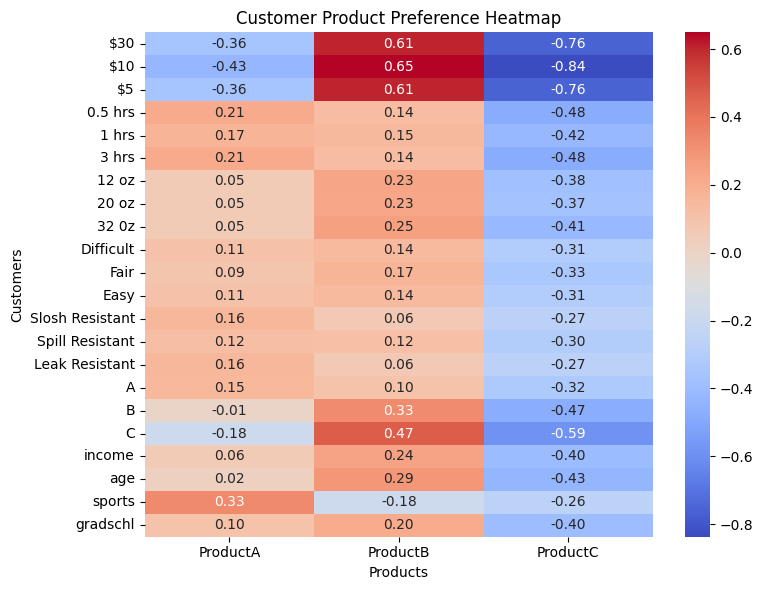

In [48]:
plt.figure(figsize=(8,6))
sns.heatmap(ProductSegmentsFinal,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Customer Product Preference Heatmap")
plt.ylabel("Customers")
plt.xlabel("Products")
plt.tight_layout()
plt.show()

In [20]:
ProductSegments.to_csv("ProductSegments.csv",index=False)